In [35]:
import matplotlib.pyplot as plt
import gdal, gdalconst
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

In [36]:
#Read SAR image into Numpy Array
#filename = "/Users/droy/Desktop/Digital Globe/056239125030_01/056239125030_01_P006_PAN/15MAY03051958-P2AS_R3C4-056239125030_01_P006.TIF'"
#sarfile = gdal.Open(filename, gdal.GA_ReadOnly)
#sarfile = gdal.Open('/home/bweel/Documents/projects/dynaslum/data/satelite/QuickBird.tif', gdal.GA_ReadOnly)
#print(sarfile.RasterYSize, sarfile.RasterXSize, sarfile.RasterCount)
#band = sarfile.GetRasterBand(7)
#sarraster = sarfile.ReadAsArray()

from satsense.util import load_from_file, normalize_image, get_rgb_image
from satsense.util import RGB, QUICKBIRD, WORLDVIEW2

from skimage import data, color, exposure, img_as_ubyte, img_as_uint

dataset, image = load_from_file('/home/bweel/Documents/projects/dynaslum/data/satelite/056239125010_01/056239125010_01_P001_MUL/08NOV02054348-M2AS_R1C1-056239125010_01_P001.TIF')
bands = QUICKBIRD

img = get_rgb_image(image, bands)

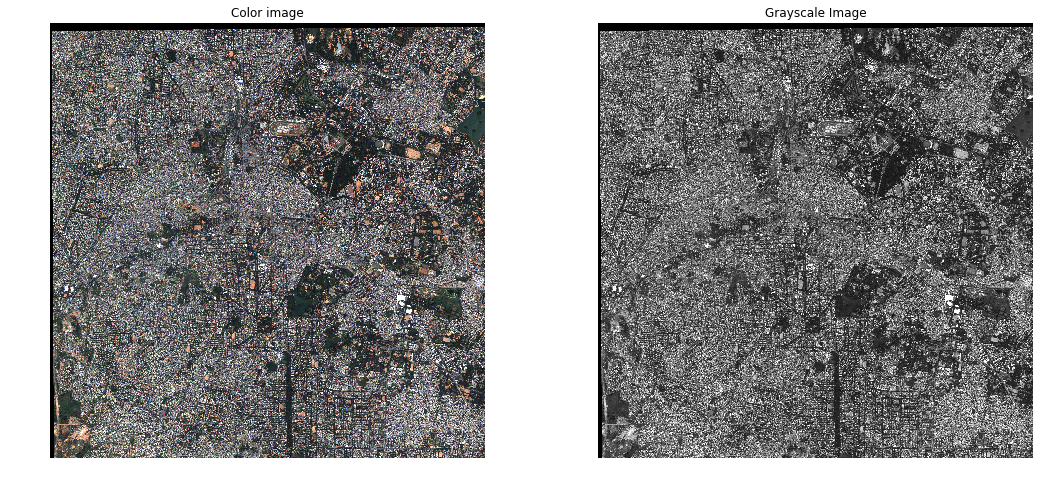

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

rgb_image = get_rgb_image(image, bands, normalize=True)
grayscale = color.rgb2gray(rgb_image)

ax1.axis('off')
ax1.imshow(rgb_image)
ax1.set_title('Color image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(grayscale, cmap=plt.cm.gray)
ax2.set_title('Grayscale Image')
ax1.set_adjustable('box-forced')
plt.show()

In [38]:
from satsense.features import glcm

In [65]:
contrastraster = np.copy(image)
contrastraster[:] = 0

dissimilarityraster = np.copy(image)
dissimilarityraster[:] = 0

homogeneityraster = np.copy(image)
homogeneityraster[:] = 0

energyraster = np.copy(image)
energyraster[:] = 0

correlationraster = np.copy(image)
correlationraster[:] = 0

ASMraster = np.copy(image)
ASMraster[:] = 0

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        result = glcm(image[i:+4, i:+4], bands)
        
        print(result[0].shape)
        contrastraster[i,j]      = greycoprops(result[0], 'contrast')
        dissimilarityraster[i,j] = greycoprops(result[0][:, :, 0, :], 'dissimilarity')
        homogeneityraster[i,j]   = greycoprops(result[0][:, :, 0, :], 'homogeneity')
        energyraster[i,j]        = greycoprops(result[0][:, :, 0, :], 'energy')
        correlationraster[i,j]   = greycoprops(result[0][:, :, 0, :], 'correlation')
        ASMraster[i,j]           = greycoprops(result[0][:, :, 0, :], 'ASM')

texturelist = {1: 'contrast', 2: 'dissimilarity', 3: ' homogeneity', 4: 'energy', 5: 'correlation', 6: 'ASM'}
for key in texturelist:
    ax = plt.subplot(2,3,key)
    plt.axis('off')
    ax.set_title(texturelist[key])
    plt.imshow(eval(texturelist[key] + "raster"), cmap = 'gray')

plt.show()

(256, 256, 4, 4)


/home/bweel/anaconda2/envs/satelite/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


ValueError: could not broadcast input array from shape (4,4) into shape (4)

In [5]:
#Create rasters to receive texture and define filenames
sarraster = img_as_ubyte(grayscale)
maximum = sarraster.max()

contrastraster = np.copy(sarraster)
contrastraster[:] = 0

dissimilarityraster = np.copy(sarraster)
dissimilarityraster[:] = 0

homogeneityraster = np.copy(sarraster)
homogeneityraster[:] = 0

energyraster = np.copy(sarraster)
energyraster[:] = 0

correlationraster = np.copy(sarraster)
correlationraster[:] = 0

ASMraster = np.copy(sarraster)
ASMraster[:] = 0

uint8 255


/home/bweel/anaconda2/envs/satelite/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [47]:
glcm = greycomatrix(sarraster[0: +4, 0: +4], [1], [0],  symmetric = True, normed = True , levels=maximum+1)

# Calculate texture and write into raster where moving window is centered
contrastraster      = greycoprops(glcm, 'contrast')
dissimilarityraster = greycoprops(glcm, 'dissimilarity')
homogeneityraster   = greycoprops(glcm, 'homogeneity')
energyraster        = greycoprops(glcm, 'energy')
correlationraster   = greycoprops(glcm, 'correlation')
ASMraster           = greycoprops(glcm, 'ASM')

#print(sarraster[0: +4, 0 : +4])
# for i in range(sarraster.shape[0] ):
#     #print i,
#     for j in range(sarraster.shape[1] ):
#         #print j,
#         # windows needs to fit completely in image
#         if i > (contrastraster.shape[0] - 4) or j > (contrastraster.shape[0] - 4):
#             continue
        
#         # Define size of moving window
#         if i >= 3 and j >= 3:
#             glcm_window = sarraster[i-3: i+4, j-3 : j+4]
#         elif i >= 3 and j < 3:
#             glcm_window = sarraster[i-3: i+4, 0 : j+4]
#         elif i < 3 and j >= 3:
#             glcm_window = sarraster[0: i+4, j-3 : j+4]
#         elif i < 3 and j < 3:
#             glcm_window = sarraster[0: i+4, 0 : j+4]
            
#         glcm_window = glcm_window/(glcm_window.max() - glcm_window.min())
#         # print(glcm_window.max())
#         # Calculate GLCM and textures
#         glcm = greycomatrix(glcm_window, [1], [0],  symmetric = True, normed = True , levels=maximum)

#         # Calculate texture and write into raster where moving window is centered
#         contrastraster[i,j]      = greycoprops(glcm, 'contrast')
#         dissimilarityraster[i,j] = greycoprops(glcm, 'dissimilarity')
#         homogeneityraster[i,j]   = greycoprops(glcm, 'homogeneity')
#         energyraster[i,j]        = greycoprops(glcm, 'energy')
#         correlationraster[i,j]   = greycoprops(glcm, 'correlation')
#         ASMraster[i,j]           = greycoprops(glcm, 'ASM')
#         glcm = None
#         glcm_window = None
        
        


# texturelist = {1: 'contrast', 2: 'dissimilarity', 3: ' homogeneity', 4: 'energy', 5: 'correlation', 6: 'ASM'}
# for key in texturelist:
#     ax = plt.subplot(2,3,key)
#     plt.axis('off')
#     ax.set_title(texturelist[key])
#     plt.imshow(eval(texturelist[key] + "raster"), cmap = 'gray')

#plt.show()

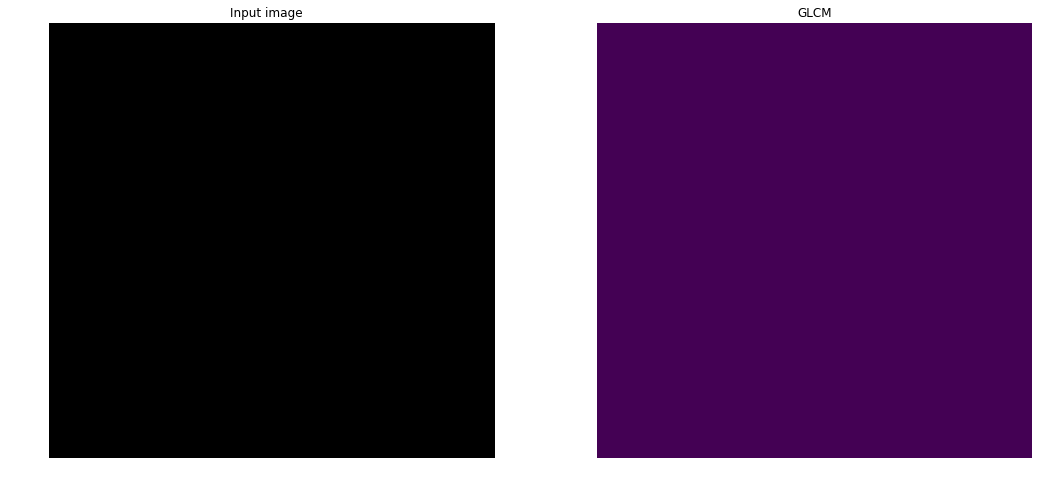

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(grayscale, plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')



ax2.axis('off')
ax2.imshow(contrastraster)
ax2.set_title('GLCM')
ax1.set_adjustable('box-forced')
plt.show()

In [8]:
image = np.array([[0, 0, 1, 1],
                   [0, 0, 1, 1],
                   [0, 2, 2, 2],
                   [2, 2, 3, 3]], dtype=np.uint8)
#result = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
#                       levels=4)
result = greycomatrix(image, [2], [0],  symmetric = False, normed = False, levels=4 )

In [9]:
print(image)
print("\n")
print(result[:, :, 0, 0])
print("\n")
print(result[:, :, 1, 0])

[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]


[[0 4 1 0]
 [0 0 0 0]
 [0 0 1 2]
 [0 0 0 0]]




IndexError: index 1 is out of bounds for axis 2 with size 1

In [60]:
import scipy as sp

def get_rii_dist_angles():
    """
    Get the angles and distances of the pixels used in the paper:
    """
    pixels_dist_1 = np.array([[1, -1], [1, 0], [1, 1], [0, 1]])
    pixels_dist_2 = np.array([[1, -2], [2, -1], [2, 0], [2, 1], [1, 2], [0, 2]])
    pixels_dist_3 = np.array([[2, 2], [2, -2]])

    angles_1 = np.arctan2(pixels_dist_1[:, 0], pixels_dist_1[:, 1])
    distances_1 = [sp.spatial.distance.euclidean([0, 0],
                                                 [pixels_dist_1[i, 0], pixels_dist_1[i, 1]])
                   for i in range(len(pixels_dist_1[:, 0]))]

    angles_2 = np.arctan2(pixels_dist_2[:, 0], pixels_dist_2[:, 1])
    distances_2 = [sp.spatial.distance.euclidean([0, 0],
                                                 [pixels_dist_2[i, 0], pixels_dist_2[i, 1]])
                   for i in range(len(pixels_dist_2[:, 0]))]

    angles_3 = np.arctan2(pixels_dist_3[:, 0], pixels_dist_3[:, 1])
    distances_3 = [sp.spatial.distance.euclidean([0, 0],
                                                 [pixels_dist_3[i, 0], pixels_dist_3[i, 1]])
                   for i in range(len(pixels_dist_3[:, 0]))]

    return (angles_1, angles_2, angles_3), (distances_1, distances_2, distances_3)


angles, distances = get_rii_dist_angles()
print("Distances {0} and angles {1}".format(distances, angles))

Distances ([1.4142135623730951, 1.0, 1.4142135623730951, 1.0], [2.2360679774997898, 2.2360679774997898, 2.0, 2.2360679774997898, 2.2360679774997898, 2.0], [2.8284271247461903, 2.8284271247461903]) and angles (array([ 2.35619449,  1.57079633,  0.78539816,  0.        ]), array([ 2.67794504,  2.03444394,  1.57079633,  1.10714872,  0.46364761,  0.        ]), array([ 0.78539816,  2.35619449]))


In [64]:
from math import sin, cos

for j in range(len(angles)):
    for i in range(len(angles[j])):
        angle = angles[j][i]
        distance = distances[j][i]

        row = round(sin(angle) * distance)
        col = round(cos(angle) * distance)

        print("{0}, {1}, row and column were: {2}, {3}".format(angle, distance, row, col))

2.356194490192345, 1.4142135623730951, row and column were: 1.0, -1.0
1.5707963267948966, 1.0, row and column were: 1.0, 0.0
0.7853981633974483, 1.4142135623730951, row and column were: 1.0, 1.0
0.0, 1.0, row and column were: 0.0, 1.0
2.677945044588987, 2.23606797749979, row and column were: 1.0, -2.0
2.0344439357957027, 2.23606797749979, row and column were: 2.0, -1.0
1.5707963267948966, 2.0, row and column were: 2.0, 0.0
1.1071487177940904, 2.23606797749979, row and column were: 2.0, 1.0
0.4636476090008061, 2.23606797749979, row and column were: 1.0, 2.0
0.0, 2.0, row and column were: 0.0, 2.0
0.7853981633974483, 2.8284271247461903, row and column were: 2.0, 2.0
2.356194490192345, 2.8284271247461903, row and column were: 2.0, -2.0
